# Copyright:
The code has been borrowed from 

https://colab.research.google.com/github/orico/PCAvsAutoencoder/blob/master/PCA_vs_Autoencoder_tutorial.ipynb

For personal study purposes only.


We take a 4D feature from iris, transformed them into 2D using either PCA or AutoEncoder. 

Then we check separation, which is better?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [38]:
X, y = datasets.load_wine(return_X_y=True, as_frame=True)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [39]:
X.shape

(178, 13)

In [88]:
X_scaled

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [43]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [105]:
def plot_transformed(X_transformed, ax, title):
    for i, target_name, color in zip([0, 1, 2], [0, 1, 2], ['red', 'blue', 'green']):
        ax.scatter(
            X_transformed[y==i, 0], 
            X_transformed[y==i, 1],
            color=color,
            alpha=1,
            lw=2,
            label=target_name,
        )
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_title(title)
    return

## PCA

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


## AutoEncoder

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [45]:
X.shape

(178, 13)

In [80]:
encoder = Sequential()
encoder.add(Dense(units=6, activation='relu', input_shape=[13]))
encoder.add(Dense(units=3, activation='relu'))
encoder.add(Dense(units=2, activation='linear'))

decoder = Sequential()
decoder.add(Dense(units=3, activation='relu'))
decoder.add(Dense(units=6, activation='relu'))
decoder.add(Dense(units=13, activation='sigmoid'))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='adam')

In [81]:
autoencoder.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 2)                 113       
                                                                 
 sequential_15 (Sequential)  (None, 13)                124       
                                                                 
Total params: 237 (948.00 Byte)
Trainable params: 237 (948.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
autoencoder.fit(
    x=X_scaled,
    y=X_scaled,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
2/2 [==============================] - 0s 5ms/step - loss: 0.0442
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0439
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0436
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0433
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 0.0430
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 0.0428
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 0.0425
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 0.0422
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 0.0420
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 0.0417
Epoch 11/200
2/2 [==============================] - 0s 14ms/step - loss: 0.0415
Epoch 12/200
2/2 [==============================] - 0s 6ms/step - loss: 0.0413
Epoch 13/200
2/2 [==============================] - 0s 12ms/

In [103]:
X_autoencoder = encoder.predict(X_scaled)

6/6 [==============================] - 0s 2ms/step


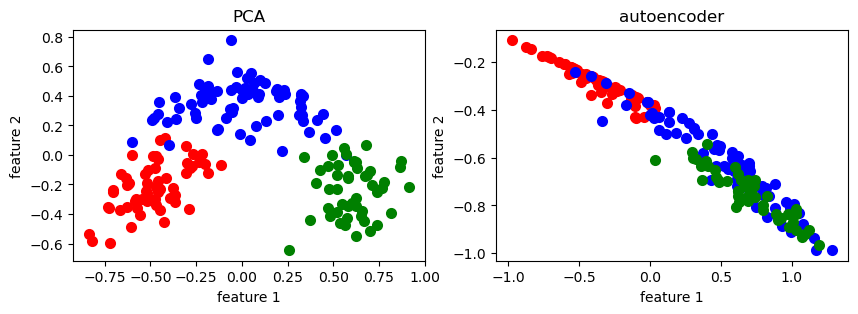

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
plot_transformed(X_pca, ax[0], 'PCA')
plot_transformed(X_autoencoder, ax[1], 'autoencoder')